
## **Group 37 STAT-201 Project Proposal**: Exploring Salaries of Data Science Professionals


### Introduction
Data science professionals have gained flexibility in recent years in regards to how they work — with more choosing to work hybrid remote or fully remote instead of spending their days in the office. Furthermore, reports suggest that data science is one of the areas in tech with the fastest growing salaries (Sendall, Peslak, Ceccucci, & Hunsinger, 2022, p. 32). 

With these notions in mind, how do salaries compare across in-person, hybrid, and fully remote workers? We found a dataset of 607 data science professionals (Data Science Job Salaries, 2022) to help us answer this question. Each observation in the data has the following variables: the year the observation was recorded; the job title of the worker; their country of residence; their salary; their experience level; their ratio of remote work; the country of their employer; the location of the employer; and the size of their company. 

The variables of interest in helping us answer our question are salary and the ratio of remote work. In this dataset, the ratio of remote work is a categorical variable that is either 0%, 50%, or 100%. These ratios are equivalent to the qualitative labels of ‘in-person’, ‘hybrid’, or ‘fully 
remote’. 

To actually answer the question, we will be computing the mean salary and standard deviation of the salary for each group of remote work done. 

The population of interest is the global community of data science professionals. We believe this dataset is relatively representative of this population because it includes workers from over 50 countries.  



### Preliminary Results
Below we will demonstrate that we can read the data from the web and wrangle it into a tidy format. We will also address our primary question with plots and tables. 

In [12]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(dplyr)))



#### Reading Data

Note that the original dataset had a column to index the rows, hence the column name `...1`

In [2]:
salary_data <- read_csv("https://raw.githubusercontent.com/william-swy/stat_201_project/main/ds_salaries.csv", show_col_types = FALSE)
head(salary_data)

New names:
* `` -> `...1`


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


#### Cleaning and Wrangling Data

The column `remote_ratio` consists of three values: `0`, `50`, `100`, which represent "in-person", "hybrid" and "remote" respectively, it makes more sense to represent the column
as a factor.

In [4]:
unique(salary_data[c("remote_ratio")])

remote_ratio
<dbl>
0
50
100


In [17]:

salary_data_clean <- salary_data %>%
                     mutate(remote_ratio = factor(remote_ratio)) %>%
                     mutate(remote_ratio = recode(remote_ratio, `0` = "in-person", `50` = "hybrid", `100` = "remote")) %>%
                     select(-...1)
head(salary_data_clean)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,in-person,DE,L
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,in-person,JP,S
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,hybrid,GB,M
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,in-person,HN,S
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,hybrid,US,L
2020,EN,FT,Data Analyst,72000,USD,72000,US,remote,US,L


#### Relevant Plots

It is helpful to see the distributions of the three different remote levels. From **Figure 1**, it seems that the means for all three different remote levels are relatively close to each other. One thing to note from the histogram is that the sample has a significant larger proportion of remote workers compared to both in-person and hybrid.

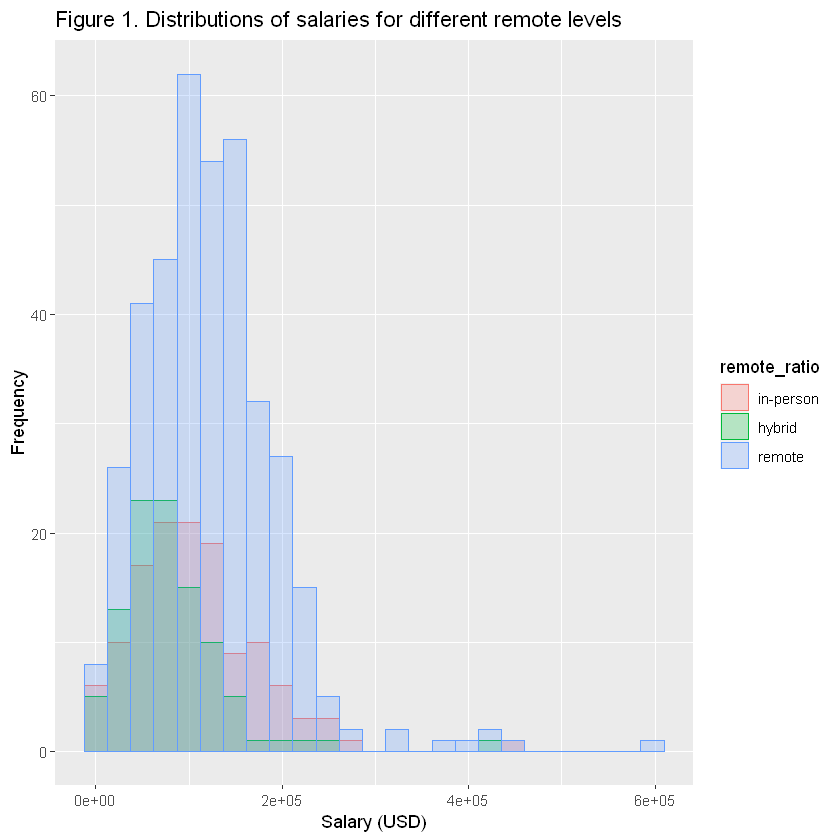

In [30]:
salary_remote_lvl_histogram <- 
                    salary_data_clean %>% 
                    ggplot() +
                    geom_histogram(aes(salary_in_usd, color=remote_ratio, fill=remote_ratio), alpha=.25, bins=25, position="identity") +
                    xlab("Salary (USD)") +
                    ylab("Frequency") +
                    ggtitle("Figure 1. Distributions of salaries for different remote levels")
salary_remote_lvl_histogram

To make the visual comparison of centers and spreads easier, a box plot was created.

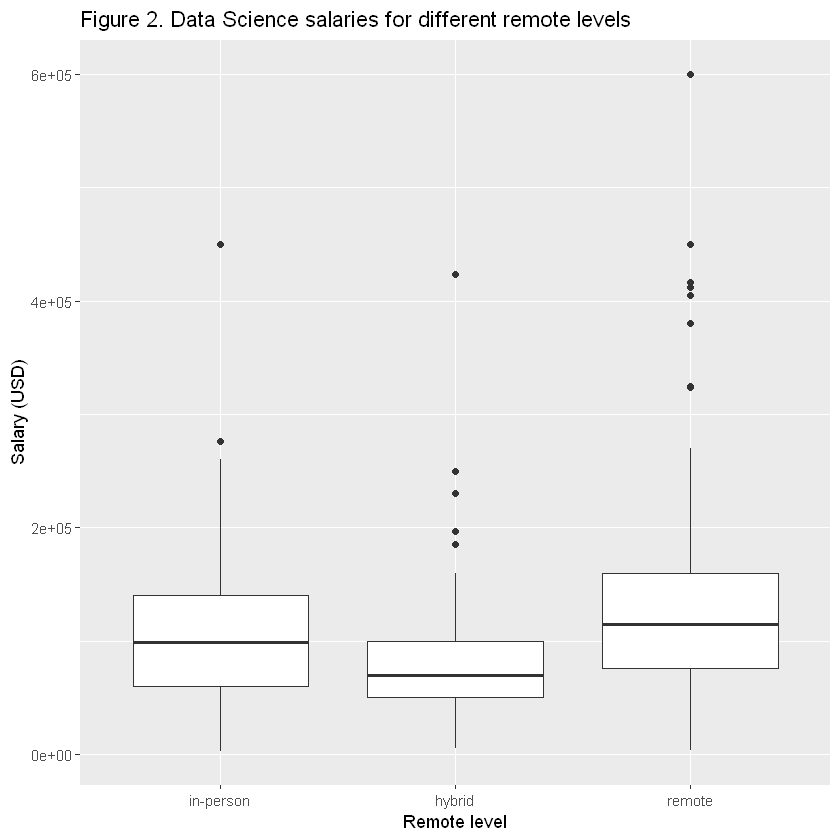

In [32]:
salary_remote_lvl_boxplot <- 
    salary_data_clean %>%
    ggplot(aes(x = remote_ratio, y = salary_in_usd)) +
    geom_boxplot() + 
    xlab("Remote level") +
    ylab("Salary (USD)") +
    ggtitle("Figure 2. Data Science salaries for different remote levels")
salary_remote_lvl_boxplot

#### Parameter Estimates
Below we will compute the mean and standard deviation of each group's salary.

In [21]:
salary_data_clean %>%
group_by(remote_ratio) %>%
summarize(mean_salary = mean(salary_in_usd), salary_sd = sd(salary_in_usd))

remote_ratio,mean_salary,salary_sd
<fct>,<dbl>,<dbl>
in-person,106354.62,67724.54
hybrid,80823.03,57353.09
remote,122457.45,72710.84


### Methods
 
 
This report uses a large sample of 607 data science professionals. Although there are slightly more fully remote workers than workers in other groups, each group sample is large enough to make an accurate estimate of the true population mean. The report includes two helpful visualizations involving a histogram and boxplot so that the reader can understand the properties of each group. 

The report might not have done enough to control for correlation and other variables. For example, it is possible that a disproportionate amount of remote workers are based in the United States, where salaries are higher (King, & Magoulas, 2015). This might inflate the mean salary of remote workers. 
A confidence interval must also be computed and visualized for each statistic. This is to better comprehend the standard variation and precision and reliability of our estimates.

This report also does not discuss or analyze any of its results. It will need to include hypothesis testing in order to reject the null hypothesis that salaries workers of different remote levels have equal salaries. This will involve bootstrapping. Since this report compares three different categories of workers (in-person, hybrid, remote), an ANOVA test will be conducted. 

Given the preliminary results, we expect to reject the hypothesis that data science salaries between different categories of remote levels are equal. Intuitively, from figure 2, it seems hybrid positions pay less compared to the other options. However, this expectation is based on intuition and not quantitative in nature. Our findings would give us an overall quantitative sense of how data science salaries vary from working on site and working remotely. One future question might include whether correlation among different variables is involved which would skew our analysis. Another future question is whether productivity is any different between different levels of remote work, and whether certain groups of workers deserve higher wages.



### References

*Data Science Job Salaries*. Kaggle. (2022, June 15). Retrieved July 26, 2022, from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries 

King, J., & Magoulas, R. (2015). *Data Science Salary Survey*. O'Reilly Media, Incorporated.

Sendall, P., Peslak, A., Ceccucci, W., & Hunsinger, D. S. (2022). The COVID-19 Pandemic’s Impact on Information Technology Employment, Salaries, and Career Opportunities. *JOURNAL OF INFORMATION SYSTEMS APPLIED RESEARCH.*
